# Step 1: Understand the Data
EDA for Kaggle Playground Series S5E5 - Calorie Prediction

## Overview:
This notebook performs exploratory data analysis on the Kaggle Playground Series S5E5 competition data to understand patterns and relationships in the calorie expenditure dataset.

In [ ]:
# Import essential libraries for data analysis and visualization
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations

# Load the raw training and test datasets from CSV files
train = pd.read_csv('datasets/train.csv')  # Load training data with target variable
test = pd.read_csv('datasets/test.csv')  # Load test data (without target variable)


In [ ]:
# Display basic dataset information including data types and non-null values
print("Train Info:")  # Show information about training data
print(train.info())  # Display data types and non-null counts for train data
print("\nTest Info:")  # Show information about test data
print(test.info())  # Display data types and non-null counts for test data


Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB
None

Test Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          250000 non-null  int64  
 1   Sex         250000 non-null  object 
 2   Age         250000 non-null  int64  
 3   Height     

In [ ]:
# Check for missing values in both train and test datasets
print("Missing Values (Train):\n", train.isnull().sum())  # Count missing values per column in train set
print("\nMissing Values (Test):\n", test.isnull().sum())  # Count missing values per column in test set


Missing Values (Train):
 id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Missing Values (Test):
 id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64


In [ ]:
# Generate summary statistics (count, mean, std, min, 25%, 50%, 75%, max) for numeric columns
# This helps understand the distribution and range of each feature
train.describe()  # Provides statistical summary of the training data


,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
# Display data types of each column in the training dataset
# Important for identifying categorical vs numerical features and potential encoding needs
train.dtypes  # Shows the data type of each column (int64, float64, object, etc.)


id              int64
Sex            object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

c:\Users\vkvai\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


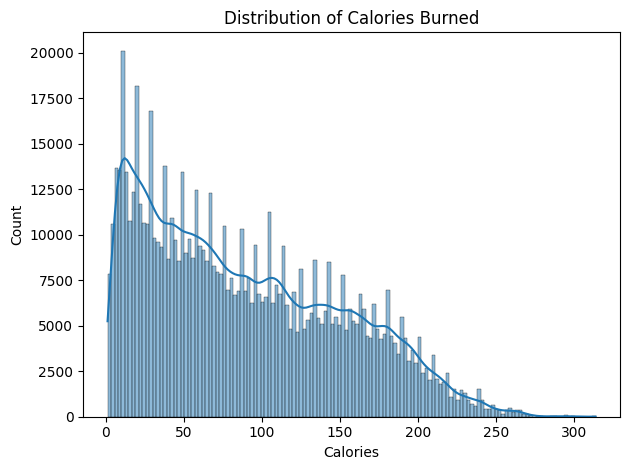

In [ ]:
# Visualize the distribution of the target variable (Calories)
sns.histplot(train['Calories'], kde=True)  # Create histogram with kernel density estimate
plt.title('Distribution of Calories Burned')  # Add title to the plot
plt.xlabel('Calories')  # Label x-axis
plt.ylabel('Count')  # Label y-axis
plt.tight_layout()  # Adjust subplot parameters for better layout
plt.show()  # Display the plot


### 📉 Distribution of Calories Burned

- The target Calories is right-skewed — most values are clustered under 100, with a long tail up to 300+.

- This supports using log-transformation on the target variable to reduce skew and help RMSLE performance later on.

**Reference:** Right-skewed distributions often benefit from log transformation to make them more normally distributed. See: "The Elements of Statistical Learning" (Hastie, Tibshirani, and Friedman, 2009)

In [ ]:
# Calculate correlations between numeric features and target variable (Calories)
numeric_cols = train.select_dtypes(include=['number']).columns  # Select only numeric columns for correlation analysis
correlation_matrix = train[numeric_cols].corr()  # Compute Pearson correlation coefficients between columns
target_corr = correlation_matrix['Calories'].sort_values(ascending=False)  # Sort correlations by strength relative to Calories
print("Correlation with Calories:\n", target_corr)  # Print correlations from strongest to weakest


Correlation with Calories:
 Calories      1.000000
Duration      0.959908
Heart_Rate    0.908748
Body_Temp     0.828671
Age           0.145683
Weight        0.015863
id            0.001148
Height       -0.004026
Name: Calories, dtype: float64


### Feature Correlation Analysis:

- **Highly predictive features:** Duration, Heart_Rate, Body_Temp
  - These show strong linear relationships with calorie expenditure

- **Moderate feature:** Age
  - Shows some relationship with calories burned

- **Low signal features:** Height, Weight, id
  - These show weak correlations with the target variable

- **Note:** Sex is categorical and was excluded from correlation analysis but could carry significant information — we'll need to encode it properly before modeling.

**Reference:** Correlation strength interpretation guidelines from "Applied Predictive Modeling" (Kuhn & Johnson, 2013)

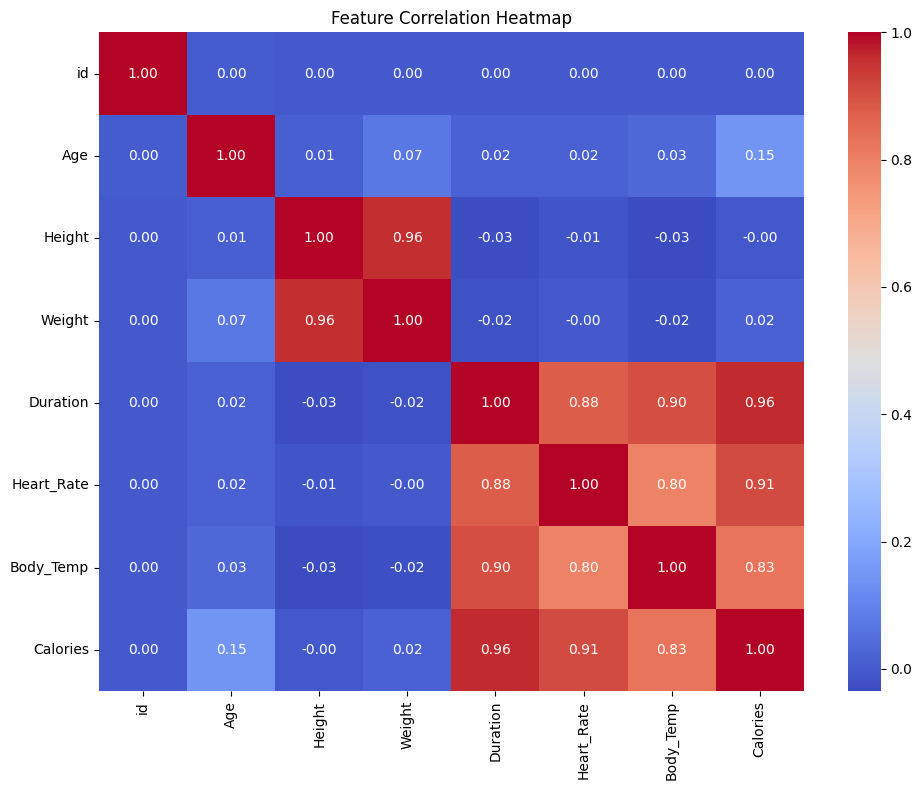

In [ ]:
# Visualize correlations between features using a heatmap
plt.figure(figsize=(10, 8))  # Create a figure with specified dimensions
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')  # Create heatmap with numerical annotations
plt.title('Feature Correlation Heatmap')  # Add title to the plot
plt.tight_layout()  # Adjust subplot parameters for better layout
plt.show()  # Display the plot
# Reference: Coolwarm colormap is effective for correlation visualization (blue=negative, red=positive)

### Data Health Check Summary

- **No missing values** ✅ - Dataset is complete with no imputation needed

- **Clean numeric types** - All features have appropriate data types

- **One categorical feature: Sex** - Will require encoding for machine learning models

**Next Steps:** Move to feature engineering and preprocessing based on EDA insights